In [10]:
import numpy as np
import sklearn as skl
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import random

# Этап 1. Исследование данных

## Внешний вид данных.

In [11]:
dataFrame = pd.read_csv('pulsar_stars.csv')

In [104]:
dataFrame.head(5)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [13]:
print('number of features: ', dataFrame.shape[1])
print('number of examples: ', dataFrame.shape[0])

number of features:  9
number of examples:  17898



### Избавимся от неопределенных значений в датасете

In [14]:
dataFrame.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

## Построим парные графики признаков

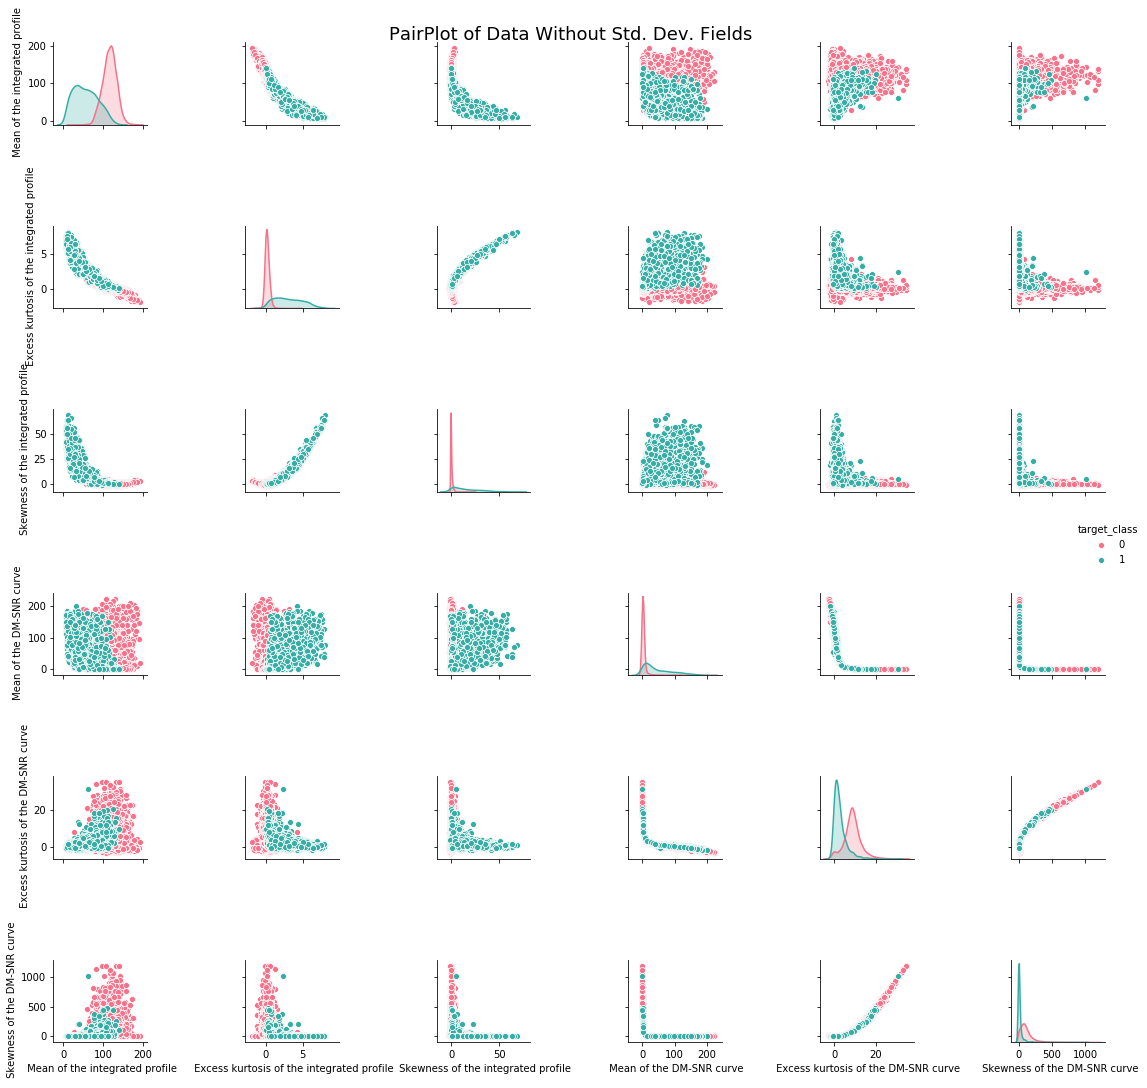

In [15]:
sb.pairplot(data=dataFrame,
             palette="husl",
             hue="target_class",
             vars=[" Mean of the integrated profile",
                   " Excess kurtosis of the integrated profile",
                   " Skewness of the integrated profile",
                   " Mean of the DM-SNR curve",
                   " Excess kurtosis of the DM-SNR curve",
                   " Skewness of the DM-SNR curve"])

plt.suptitle("PairPlot of Data Without Std. Dev. Fields",fontsize=18)

plt.tight_layout()
plt.show() 

### Видим, что на всех графиках синие и красные точки могут быть разделены одной линией (за исключениемм выбросов)

Проверим корелляцию Пирсона признаков.

In [16]:
dataFrame.corr()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
Mean of the integrated profile,1.000000,0.547137,-0.873898,-0.738775,-0.298841,-0.307016,0.234331,0.144033,-0.673181
Standard deviation of the integrated profile,0.547137,1.000000,-0.521435,-0.539793,0.006869,-0.047632,0.029429,0.027691,-0.363708
Excess kurtosis of the integrated profile,-0.873898,-0.521435,1.000000,0.945729,0.414368,0.432880,-0.341209,-0.214491,0.791591
Skewness of the integrated profile,-0.738775,-0.539793,0.945729,1.000000,0.412056,0.415140,-0.328843,-0.204782,0.709528
Mean of the DM-SNR curve,-0.298841,0.006869,0.414368,0.412056,1.000000,0.796555,-0.615971,-0.354269,0.400876
Standard deviation of the DM-SNR curve,-0.307016,-0.047632,0.432880,0.415140,0.796555,1.000000,-0.809786,-0.575800,0.491535
Excess kurtosis of the DM-SNR curve,0.234331,0.029429,-0.341209,-0.328843,-0.615971,-0.809786,1.000000,0.923743,-0.390816
Skewness of the DM-SNR curve,0.144033,0.027691,-0.214491,-0.204782,-0.354269,-0.575800,0.923743,1.000000,-0.259117
target_class,-0.673181,-0.363708,0.791591,0.709528,0.400876,0.491535,-0.390816,-0.259117,1.000000


Значение 1.0 обозначает полную корелляцию - пример: температура в градусах по Цельсию и по Кельвину.
Значений больше 0.95 нет, значит будем использовать все признаки.

Добавим для наглядности спецэффекты:

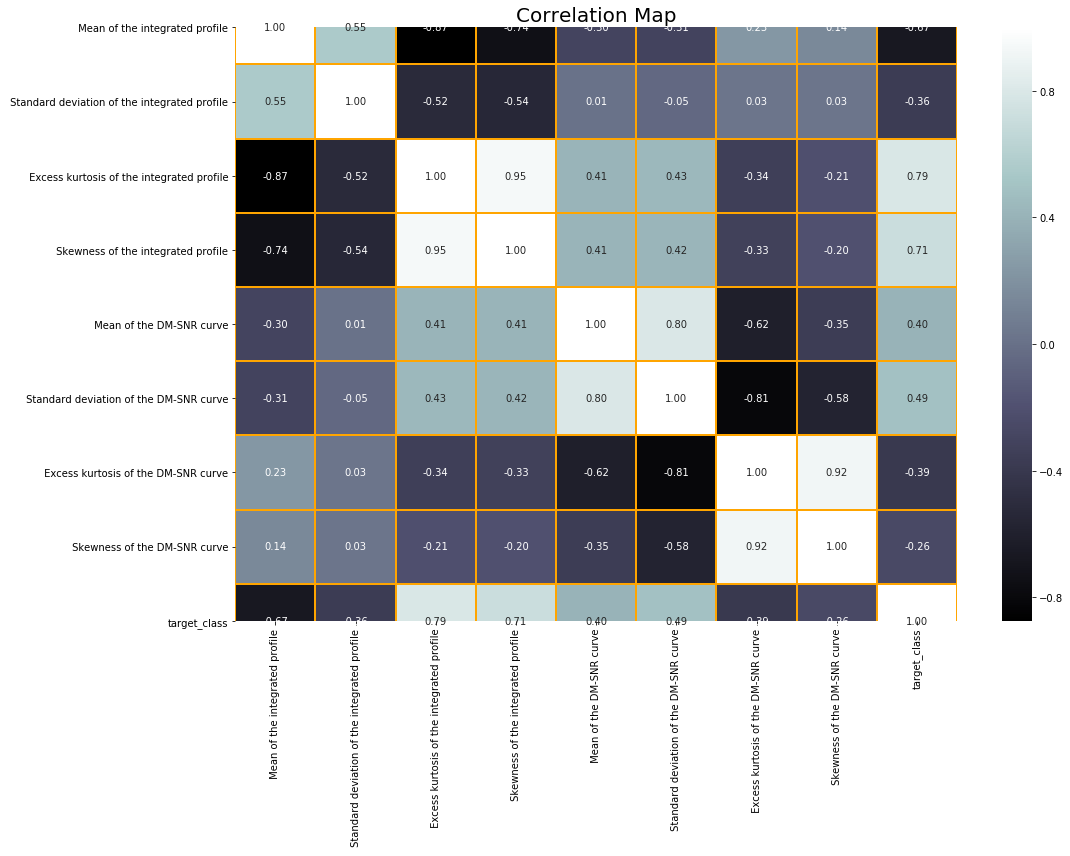

In [17]:
plt.figure(figsize=(16,12))
sb.heatmap(data=dataFrame.corr(),annot=True,cmap="bone",linewidths=1,fmt=".2f",linecolor="orange")
plt.title("Correlation Map",fontsize=20)
plt.tight_layout()
plt.show()

# Этап 2. Подготовка данных

Проверим сбалансированность выборки.

In [18]:
uniq, counts = np.unique(dataFrame['target_class'], return_counts=True)
print(uniq[0], counts[0])
print(uniq[1], counts[1])

0 16259
1 1639


Видим,что выборка несбалансированна - объектов со значением целевой переменной 1 (пульсаров) намного меньше

## В чем проблема?
В несбалансированных выборках классификаторы зачастую могут выбирать всегда один и тот же вариант ответа, 
чтобы минимизировать ошибку. Пример - рассмотрим задачу диагностирования болезни. Допустим, что в обучающую
выборку попали 1000 здоровых и 1 больной пациент. Тогда классификатор может всегда выдавать один и тот же
ответ - человек здоров, вне зависимости от входных данных, точность такого предсказания на обучающей выборке 
будет очень большой, но, очевидно, необъективной.

Существует два метода решения проблемы:
Undersampling и oversampling, коротко: первый выбрасывает некоторое количество объектов преобладающего класса, в то
время как второй наоборот - дублирует объекты маленьких классов.
В решении задачи будем использовать оба метода, а также попробуем оставить всё "как есть"

Конечно, для данных методов существуют специальные библиотеки, но попробуем обойтись без них.

In [19]:
def makeUnderSampling(dataFrame, n):
    df = dataFrame
    while np.unique(df['target_class'], return_counts=True)[1][0] > n:
        randomNumber = random.randint(0, df.shape[0]-1)
        if df['target_class'][randomNumber] == 0:
            df.drop(axis = 0, index = randomNumber, inplace = True)
            df.reset_index(inplace=True)
            df.drop(columns=('index'), inplace=True)
    return df

Будем использовать случайное удаление из выборки, так как выборка может быть отсортирована.

Проверим корректность работы нашей функции:

In [20]:
underSampled = makeUnderSampling(dataFrame, 1650)
uniq, counts = np.unique(underSampled['target_class'], return_counts=True)
print(uniq[0], counts[0])
print(uniq[1], counts[1])

0 1650
1 1639


Сделаем аналогичную функцию makeOverSampling:

In [21]:
def makeOverSampling(dataFrame, n):
    df = dataFrame
    while np.unique(df['target_class'], return_counts=True)[1][1] < n:
        randomNumber = random.randint(0, df.shape[0]-1)
        if df['target_class'][randomNumber] == 1:
            df = df.append(df.iloc[[randomNumber]], ignore_index=True)
    return df

Аналогично проверим работоспособность этой функции

In [22]:
overSampled = makeOverSampling(dataFrame, 16000)
uniq, counts = np.unique(overSampled['target_class'], return_counts=True)
print(uniq[0], counts[0])
print(uniq[1], counts[1])

0 1650
1 16000


Теперь отложим из датасета 25% данных для теста нашей модели

In [23]:
dataFrame = pd.read_csv('pulsar_stars.csv')

In [24]:
y = dataFrame['target_class']
X = dataFrame.drop(columns=['target_class'])

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [26]:
y_test = y_test.reset_index().drop(columns="index")
y_train = y_train.reset_index().drop(columns="index")
X_test = X_test.reset_index().drop(columns="index")
X_train = X_train.reset_index().drop(columns="index")

проверим размерности полученных наборов данных:

In [27]:
print("Тренировочные признаки", X_train.shape)
print("Тестовые признаки", X_test.shape)
print("Тренировные целевые переменные", y_train.shape)
print("Тестовые целевые переменные", y_test.shape)

Тренировочные признаки (13423, 8)
Тестовые признаки (4475, 8)
Тренировные целевые переменные (13423, 1)
Тестовые целевые переменные (4475, 1)


Разделим теперь и oversampled & undersampled наборы

In [28]:
dataFrameForSampling = ((X_train).join(y_train))
dataFrameForSampling.reset_index(inplace=True)
dataFrameForSampling.drop(columns="index", inplace=True)

In [29]:
dataFrameForSampling

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,27.765625,28.666042,5.770087,37.419009,73.112876,62.070220,1.268206,1.082920,1
1,120.296875,54.727215,0.301237,-0.456310,21.505853,63.015055,2.771419,6.015646,0
2,114.625000,55.154471,0.262474,-0.263088,2.202341,15.390161,10.108026,125.888177,0
3,72.398438,31.991049,2.675793,11.959036,17.673913,50.811992,3.161200,9.063753,1
4,105.562500,42.715950,0.426848,0.863334,5.203177,28.660882,5.785800,34.028598,0
...,...,...,...,...,...,...,...,...,...
13418,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0
13419,115.617188,46.784600,0.218177,0.226757,6.140468,30.271961,5.732201,34.357283,0
13420,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0
13421,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0


In [30]:
dataFrameOverSampled = makeOverSampling(dataFrameForSampling, 11200)
print("oversampling shape", dataFrameOverSampled.shape)

oversampling shape (23389, 9)


In [31]:
dataFrameUnderSampled = makeUnderSampling(dataFrameForSampling, 1155)
print("undersampling shape", dataFrameUnderSampled.shape)

undersampling shape (2389, 9)


In [32]:
y_over = dataFrameOverSampled['target_class']
X_over = dataFrameOverSampled.drop(columns=['target_class'])

In [33]:
y_under = dataFrameUnderSampled['target_class']
X_under = dataFrameUnderSampled.drop(columns=['target_class'])

# Этап 3. Обучение моделей

## Переобучение и регуляризаторы

### Линейный классификатор.

##### Лассо регуляризатор

In [37]:
from sklearn.linear_model import Lasso

In [38]:
estimator_normal_lasso = Lasso()
classifier_normal_lasso = estimator_normal_lasso.fit(X_train, y_train)

In [39]:
estimator_over_lasso = Lasso()
classifier_over_lasso = estimator_over_lasso.fit(X_over, y_over)

In [40]:
estimator_under_lasso = Lasso()
classifier_under_lasso = estimator_under_lasso.fit(X_under, y_under)

##### Ридж регуляризатор

In [41]:
from sklearn.linear_model import RidgeClassifier

Преобразуем наши dataframe к списку

In [42]:
from sklearn.utils import column_or_1d

In [43]:
y_train = column_or_1d(y_train)
y_test = column_or_1d(y_test)

In [44]:
estimator_normal_ridge = RidgeClassifier()
classifier_normal_ridge = estimator_normal_ridge.fit(X_train, y_train)

In [45]:
estimator_over_ridge = RidgeClassifier()
classifier_over_ridge = estimator_over_ridge.fit(X_over, y_over)

In [46]:
estimator_under_ridge = RidgeClassifier()
classifier_under_ridge = estimator_under_ridge.fit(X_under, y_under)

Теперь, обучив первые модели мы можем сравнить качество полученных моделей. Нас интересует разница между моделями, обученными на oversampling, undersampling, и исходном наборах данных.

### Выбор метрики качества моделей.

Мы решаем задачу бинарной классификации звёзд, в которой, очевидно, хуже - упустить хотя бы потенциальную нейтронную звезду, поэтому мы можем пожертвовать точностью в пользу полноты. Для полноценной оценки будем использовать множество оценок, начав с confusion matrix (CM).
Это таблица 2х2, разберем каждую клетку этой таблицы.

In [47]:
pd.DataFrame(data=(("TP", "FN"),("FP", "TN")), index=("P", "N"), columns=("P", "N"))

,P,N
P,TP,FN
N,FP,TN


TP - вернопредсказанные единицы (В нашем случае - это означает, что модель "предсказала" пульсар, и объект является пульсаром)

FN - ложнопредсказанный ноль (В нашем случае - модель предсказала обычную звезду, но она оказалась пульсаром)

FP - ложнопредсказанная единица (В нашем случае - предсказали пульсар, оказалась обычная звезда)

TN - вернопредсказанный ноль (В нашем случае - предсказали обычную звезду, оказалась обычной звездой)

С новыми знаниями определим ещё 3 меры:

    1) Precision (точность) - отношение количества правильно предсказанных единиц к общему количеству предсказанных единиц: precision = TP/(TP+FP)
    
    2) Recall (полнота) - отношение количества правильно предсказанных единиц к общему количеству действительных единиц: recall = TP/(TP+FN)
    
    3) F-мера - наиболее полная мера, объединияющая и точность и полноту: 
    F-measure = 2*recall*precision/(recall+precision)

Будем оценивать модели отдельно двумя критерями - полнотой и Accuracy - количество верных предсказаний делить на количество предсказаний

In [48]:
normal_lasso_predicted = classifier_normal_lasso.predict(X_test)
over_lasso_predicted = classifier_over_lasso.predict(X_test)
under_lasso_predicted = classifier_under_lasso.predict(X_test)

In [49]:
normal_ridge_predicted = classifier_normal_ridge.predict(X_test)
over_ridge_predicted = classifier_over_ridge.predict(X_test)
under_ridge_predicted = classifier_under_ridge.predict(X_test)

Очевидно что линейная модель совершенна неспособна разделить объекты на два класса одной плоскостью, проверим это:

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Фактически мы предсказали вероятность каждого объекта быть пульсаром или звездой с точки зрения линейного классификатора, теперь распределим эти вероятности по классам

In [51]:
def classifictionFromProbability(arr, threshold):
    for i in range(len(arr)):
        if arr[i] >= threshold:
            arr[i] = 1
        else:
            arr[i] = 0
    return arr

normal_lasso_predicted = classifictionFromProbability(normal_lasso_predicted, 0.5)
over_lasso_predicted = classifictionFromProbability(over_lasso_predicted, 0.5)
under_lasso_predicted = classifictionFromProbability(under_lasso_predicted, 0.5)

### Первичная оценка модели

#### Лассо регуляризатор

In [52]:
print("Classification report for normal lasso linear model\n", classification_report(y_test, normal_lasso_predicted))

Classification report for normal lasso linear model
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      4070
           1       0.98      0.48      0.65       405

    accuracy                           0.95      4475
   macro avg       0.97      0.74      0.81      4475
weighted avg       0.95      0.95      0.94      4475



Как мы видим - случилась самая неприятная для нашей задачи вещь - модель начала относить большинство звезд к классу обычных, потому что это набор данных не сбалансирован.

In [53]:
print("Classification report for oversampled lasso linear model\n", classification_report(y_test, over_lasso_predicted))

Classification report for oversampled lasso linear model
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4070
           1       0.80      0.85      0.82       405

    accuracy                           0.97      4475
   macro avg       0.89      0.91      0.90      4475
weighted avg       0.97      0.97      0.97      4475



Эта модель представляет уже больший интерес- показатель полноты для класса пульсаров вырос почти на 35%

In [54]:
print("Classification report for undersampled lasso linear model\n", classification_report(y_test, under_lasso_predicted))

Classification report for undersampled lasso linear model
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      4070
           1       0.74      0.86      0.80       405

    accuracy                           0.96      4475
   macro avg       0.86      0.92      0.89      4475
weighted avg       0.96      0.96      0.96      4475



Итак, для этого метода полнота класса пульсаров стала ещё больше, идём дальше.

#### Ридж регуляризатор

In [55]:
print("Classification report for normal ridge linear model\n", classification_report(y_test, normal_ridge_predicted))

Classification report for normal ridge linear model
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      4070
           1       0.96      0.70      0.81       405

    accuracy                           0.97      4475
   macro avg       0.97      0.85      0.90      4475
weighted avg       0.97      0.97      0.97      4475



Для этого вида регуляризаторов на исходном наборе данных результаты чуть лучше, чем для предыдущего
Рассмотрим остальные два набора данных.

In [56]:
print("Classification report for oversampled ridge linear model\n", classification_report(y_test, over_ridge_predicted))

Classification report for oversampled ridge linear model
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4070
           1       0.89      0.87      0.88       405

    accuracy                           0.98      4475
   macro avg       0.94      0.93      0.93      4475
weighted avg       0.98      0.98      0.98      4475



In [57]:
print("Classification report for undersampled ridge linear model\n", classification_report(y_test, under_ridge_predicted))

Classification report for undersampled ridge linear model
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4070
           1       0.86      0.88      0.87       405

    accuracy                           0.98      4475
   macro avg       0.92      0.93      0.93      4475
weighted avg       0.98      0.98      0.98      4475



Как мы видим - в целом Ридж сработал лучше.

Напомню главное отличие Ридж регуляризатора от Лассо: в первом используется квадрат разности, а во втором- модуль разности. 

Разница в результатах объясняется дифференцируемостью Риджа, а следственно и его способностью убирать корелирующие признаки.

Аналогично попробуем логистическую регрессию, единственное отличие которой - использование экспоненциальной функции активации вместо линейной.

## Логистическая регрессия

Мы выяснили, Ридж регуляризатор в большей мере обладает необходимыми нам свойствами, будем использовать его.

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
classifier_logistic = LogisticRegression()
normal_logistic_classifier = classifier_logistic.fit(X_train, y_train)
over_logistic_classifier = classifier_logistic.fit(X_over, y_over)
under_logistic_classifier = classifier_logistic.fit(X_under, y_under)

normal_logistic_predicted = normal_logistic_classifier.predict(X_test)
over_logistic_predicted = over_logistic_classifier.predict(X_test)
under_logistic_predicted = under_logistic_classifier.predict(X_test)

/home/godder/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/godder/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/godder/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Сравним 3 полученные модели:

In [60]:
print("Classification report for normal logistic model\n", classification_report(y_test, normal_logistic_predicted))
print("Classification report for oversampled logistic model\n", classification_report(y_test, over_logistic_predicted))
print("Classification report for undersampled logistic model\n", classification_report(y_test, under_logistic_predicted))


Classification report for normal logistic model
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      4070
           1       0.76      0.92      0.83       405

    accuracy                           0.97      4475
   macro avg       0.88      0.94      0.91      4475
weighted avg       0.97      0.97      0.97      4475

Classification report for oversampled logistic model
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      4070
           1       0.76      0.92      0.83       405

    accuracy                           0.97      4475
   macro avg       0.88      0.94      0.91      4475
weighted avg       0.97      0.97      0.97      4475

Classification report for undersampled logistic model
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      4070
           1       0.76      0.92      0.83       405

    accuracy            

Нужная нам полнота класса пульсаров ещё немного повысилась, пойдем дальше.

### Метод К ближайших соседей (KNN)

In [61]:
from sklearn.neighbors import KNeighborsClassifier

KNNclassifier_normal = KNeighborsClassifier(n_neighbors=13)
KNNclassifier_normal.fit(X_train, y_train)
KNN_normal_prediction = KNNclassifier_normal.predict(X_test)

KNNclassifier_over = KNeighborsClassifier(n_neighbors=13)
KNNclassifier_over.fit(X_over, y_over)
KNN_over_prediction = KNNclassifier_over.predict(X_test)

KNNclassifier_under = KNeighborsClassifier(n_neighbors=13)
KNNclassifier_under.fit(X_under, y_under)
KNN_under_prediction = KNNclassifier_under.predict(X_test)

In [62]:
print("Classification report for normal knn model\n", classification_report(y_test, KNN_normal_prediction))
print("Classification report for oversampled knn model\n", classification_report(y_test, KNN_over_prediction))
print("Classification report for undersampled knn model\n", classification_report(y_test, KNN_under_prediction))

Classification report for normal knn model
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4070
           1       0.91      0.79      0.85       405

    accuracy                           0.97      4475
   macro avg       0.95      0.89      0.92      4475
weighted avg       0.97      0.97      0.97      4475

Classification report for oversampled knn model
               precision    recall  f1-score   support

           0       0.99      0.93      0.96      4070
           1       0.57      0.88      0.69       405

    accuracy                           0.93      4475
   macro avg       0.78      0.91      0.82      4475
weighted avg       0.95      0.93      0.94      4475

Classification report for undersampled knn model
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      4070
           1       0.64      0.89      0.74       405

    accuracy                           

На одном из наборов модель показала наилучшую общую оценку (F1-measure), но нас в нашей задаче это не устраивает - нам нужна полнота класса 1

### Построение наивного Байеса

происходит с помощью одноименной теоремы, в решении отбрасывает "незначимые", что на практике может привести к печальным последствиям.

In [63]:
from sklearn.naive_bayes import GaussianNB

In [64]:
bayes_normal = GaussianNB()

bayes_normal_predicted = bayes_normal.fit(X_train, y_train).predict(X_test)
bayes_over_predicted = bayes_normal.fit(X_over, y_over).predict(X_test)
bayes_under_predicted = bayes_normal.fit(X_under, y_under).predict(X_test)

In [65]:
print("Classification report for normal bayes model\n", classification_report(y_test, bayes_normal_predicted))
print("Classification report for oversampled bayes model\n", classification_report(y_test, bayes_over_predicted))
print("Classification report for undersampled bayes model\n", classification_report(y_test, bayes_under_predicted))

Classification report for normal bayes model
               precision    recall  f1-score   support

           0       0.99      0.96      0.97      4070
           1       0.66      0.86      0.75       405

    accuracy                           0.95      4475
   macro avg       0.82      0.91      0.86      4475
weighted avg       0.96      0.95      0.95      4475

Classification report for oversampled bayes model
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      4070
           1       0.63      0.86      0.73       405

    accuracy                           0.94      4475
   macro avg       0.81      0.91      0.85      4475
weighted avg       0.95      0.94      0.95      4475

Classification report for undersampled bayes model
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      4070
           1       0.62      0.87      0.72       405

    accuracy                     

Итак, вероятностная модель имеет не лучший показатель, перейдем к заключительной модели.

### Решающее дерево

In [66]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier()

В этой моделе мы не ограничимся параметрами по умолчанию, вместо этого мы подберем параметры по сетке (GridSearchSV), которые обеспечат наилучший результат

In [67]:
tree_classifier.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

criterion - критерии останова, определяют в какой момент нужно остановиться, чтобы дерево не переобучилось

max_depth - максимально допустимая глубина деревьев, по достижении которй построение дерева прекращается

max_features - количество признаков, по которым мы смотрим стоит ли строить следующую вершину

min_samples_split - минимальное количество объектов, при котором мы строим следующую вершину

min_samples_leaf - минимально возможное количество объектов в одной вершине


Создадим сетку, обходя которую будем подбирать лучшие параметры.

In [77]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 100, 75, 50, 25, 20, 10, 5],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 3, 5, 7, 10]
}

In [95]:
import time
from sklearn.metrics import recall_score

In [96]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(tree_classifier, param_grid, scoring="f1")

In [97]:
%%time
grid_cv.fit(X_train, y_train)

/home/godder/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


CPU times: user 2min 44s, sys: 0 ns, total: 2min 44s
Wall time: 2min 44s


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 100, 75, 50, 25, 20, 10, 5]

In [98]:
grid_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [99]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.8781516815005125
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 7, 'min_samples_split': 5}


Мы получили наилучшее дерево, возможное при наших параметрах. Сравним его с деревом, построенным на параметрах по умолчанию.

In [100]:
tree = DecisionTreeClassifier()
tree_predicted = tree.fit(X_train, y_train).predict(X_test)

In [101]:
grid_tree_predicted = grid_cv.best_estimator_.predict(X_test)

In [102]:
print("Classification report for grid search tree model\n", classification_report(y_test, grid_tree_predicted))
print("Classification report for default tree model\n", classification_report(y_test, tree_predicted))

Classification report for grid search tree model
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4070
           1       0.93      0.80      0.86       405

    accuracy                           0.98      4475
   macro avg       0.95      0.89      0.92      4475
weighted avg       0.98      0.98      0.98      4475

Classification report for default tree model
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4070
           1       0.85      0.84      0.85       405

    accuracy                           0.97      4475
   macro avg       0.92      0.92      0.92      4475
weighted avg       0.97      0.97      0.97      4475



## Этап 4. Подведение итогов

Мы обучили основные модели машинного обучения, настало время подвести итоги. Подведем итоги по двум метрикам, 
будем использовать две метрики - f1 score и recall для класса пульсаров. 

In [103]:
pd.DataFrame(((0.86, 0.82), (0.88, 0.88), (0.92, 0.83), (0.89, 0.95), (0.84, 0.86)),index=("Lasso Linear", "Lasso Ridge", "Logistic Classifier", "KNN", "Decision Tree") ,columns=('recall', 'f1 score'))

,recall,f1 score
Lasso Linear,0.86,0.82
Lasso Ridge,0.88,0.88
Logistic Classifier,0.92,0.83
KNN,0.89,0.95
Decision Tree,0.84,0.86
